In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlsettings.settings import load_app_config, get_datafolder_path 
import os.path

% matplotlib inline 
from numpy import set_printoptions
set_printoptions(precision=4)
pd.set_option('display.width', 120)
pd.set_option('precision', 4)

In [2]:
load_app_config()
DIRECTORY="autos"
FILENAME ='autos.csv'
 
input_path = get_datafolder_path()

{'DEV': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'PRD': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'UAT': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'REG': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}}
Adding F:\DataSource  to system path
Adding F:\MachineLearning  to system path


In [3]:
input_file = os.path.join(input_path, DIRECTORY, FILENAME)
autos_dataset = pd.read_csv(input_file)

In [4]:
autos_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 26 columns):
symboling            216 non-null int64
normalized-losses    175 non-null float64
make-id              216 non-null int64
fuel-type            216 non-null object
aspiration           216 non-null object
num-of-doors         214 non-null object
body-style           216 non-null object
drive-wheels         216 non-null object
engine-location      216 non-null object
wheel-base           216 non-null float64
length               216 non-null float64
width                216 non-null float64
height               216 non-null float64
curb-weight          216 non-null int64
engine-type          216 non-null object
num-of-cylinders     216 non-null object
engine-size          216 non-null int64
fuel-system          216 non-null object
bore                 212 non-null float64
stroke               212 non-null float64
compression-ratio    216 non-null float64
horsepower           214 non-n

In [5]:
autos_nullsum=autos_dataset.isnull().sum()
null_columns =autos_nullsum[autos_nullsum!=0].index.values
null_columns=list(null_columns)
null_columns

['normalized-losses',
 'num-of-doors',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm',
 'price']

In [6]:
autos_dataset.dropna(axis =0, inplace =True)

In [7]:
autos_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 3 to 215
Data columns (total 26 columns):
symboling            170 non-null int64
normalized-losses    170 non-null float64
make-id              170 non-null int64
fuel-type            170 non-null object
aspiration           170 non-null object
num-of-doors         170 non-null object
body-style           170 non-null object
drive-wheels         170 non-null object
engine-location      170 non-null object
wheel-base           170 non-null float64
length               170 non-null float64
width                170 non-null float64
height               170 non-null float64
curb-weight          170 non-null int64
engine-type          170 non-null object
num-of-cylinders     170 non-null object
engine-size          170 non-null int64
fuel-system          170 non-null object
bore                 170 non-null float64
stroke               170 non-null float64
compression-ratio    170 non-null float64
horsepower           170 non-n

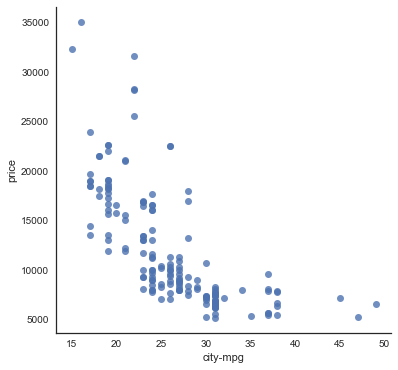

In [38]:
sns.set(style="white", color_codes=True)
fig = plt.figure(figsize=(6, 6))
ax = sns.regplot(x = 'city-mpg', y = 'price',data = autos_dataset , fit_reg=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [13]:
autos_dataset.head()

,symboling,normalized-losses,make-id,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,2,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,2,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,2,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,2,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,3,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


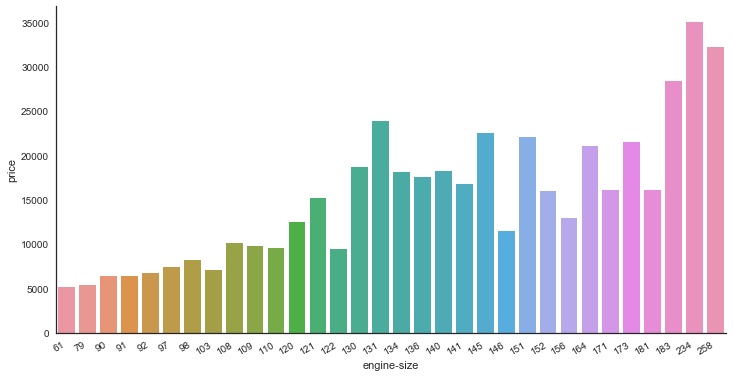

In [42]:
fig = plt.figure(figsize=(12,6)) 
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x='engine-size' , y='price' ,data=autos_dataset,ax=ax,errwidth =0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

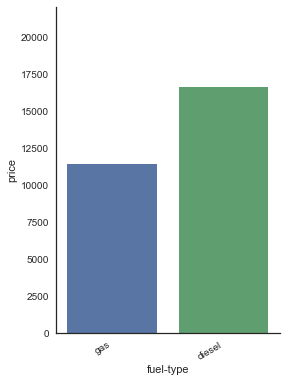

In [43]:
fig = plt.figure(figsize=(4,6)) 
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x='fuel-type' , y='price' ,data=autos_dataset,ax=ax,errwidth =0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

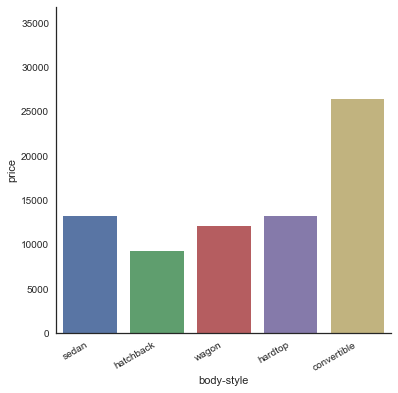

In [44]:
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x='body-style' , y='price' ,data=autos_dataset,ax=ax,errwidth =0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()